## ✅ Step 1: Data Collection

### 🎯 Goal:
#### Gather historical data that includes:
##### • Cryptocurrency price
##### • Trading volume
##### • Market cap
##### • And anything related to liquidity or volatility

### Load & Combine Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

# Load data
df_1 = pd.read_csv("Dataset/coin_gecko_2022-03-16.csv")
df_2 = pd.read_csv("Dataset/coin_gecko_2022-03-17.csv")

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

# Combine data
df = pd.concat([df_1, df_2], ignore_index=True)

# View info
print("✅ Dataset Loaded")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

✅ Dataset Loaded
Shape: (1000, 9)
Columns: ['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'date']


,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


## ✅ Step 2: Data Preprocessing

### 🎯 Goal:
##### • Handle missing values
##### • Clean irrelevant or inconsistent entries
##### • Prepare features for later steps (like scaling or encoding)

In [4]:
# Check missing values
print("🔍 Missing Value")
print(df.isnull().sum())

🔍 Missing Value
coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64


In [5]:
# Fill numeric columns with mean (if few missing)

for col in ['1h', '24h', '7d', '24h_volume']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

print("🔍Recheck missing values:")
df.info()

🔍Recheck missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          1000 non-null   float64
 4   24h         1000 non-null   float64
 5   7d          1000 non-null   float64
 6   24h_volume  1000 non-null   float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [6]:
# Convert date column to dateime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Recheck the datatypes
print("Datatypes of the columns")
df.info()

Datatypes of the columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   coin        1000 non-null   object        
 1   symbol      1000 non-null   object        
 2   price       1000 non-null   float64       
 3   1h          1000 non-null   float64       
 4   24h         1000 non-null   float64       
 5   7d          1000 non-null   float64       
 6   24h_volume  1000 non-null   float64       
 7   mkt_cap     1000 non-null   float64       
 8   date        1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 70.4+ KB


## ✅ Step 3: Exploratory Data Analysis (EDA)

### 🎯 Goal:
##### • Visualize patterns 📊

##### • Detect outliers ⚡

##### • Understand correlations 🔗

##### • Find interesting trends 📈

In [7]:
df_eda = df.copy()

# Basic Dataset Information
print("✅ Dataset Overview")
display(df_eda.describe())

# Check Skewness and Kurtosis
print("\n✅ Skewness:")
df_eda.select_dtypes(include=['number']).skew()

✅ Dataset Overview


,price,1h,24h,7d,24h_volume,mkt_cap,date
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000
mean,6.561060e+02,0.009723,0.023737,0.023558,2.893109e+08,3.755304e+09,2022-03-16 12:00:00
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07,2022-03-16 00:00:00
25%,1.940547e-01,0.001000,0.001000,-0.040250,1.842994e+06,1.157776e+08,2022-03-16 00:00:00
50%,1.095000e+00,0.006000,0.016000,0.000000,8.439940e+06,2.120036e+08,2022-03-16 12:00:00
75%,7.232500e+00,0.019000,0.035000,0.036000,4.109914e+07,5.948436e+08,2022-03-17 00:00:00
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11,2022-03-17 00:00:00
std,4.584655e+03,0.026840,0.059095,0.228859,2.760186e+09,3.803783e+10,NaN



✅ Skewness:


price          8.273078
1h           -18.680983
24h            1.767974
7d            11.256017
24h_volume    16.089643
mkt_cap       17.961692
dtype: float64

#### Numeric Features Analysis

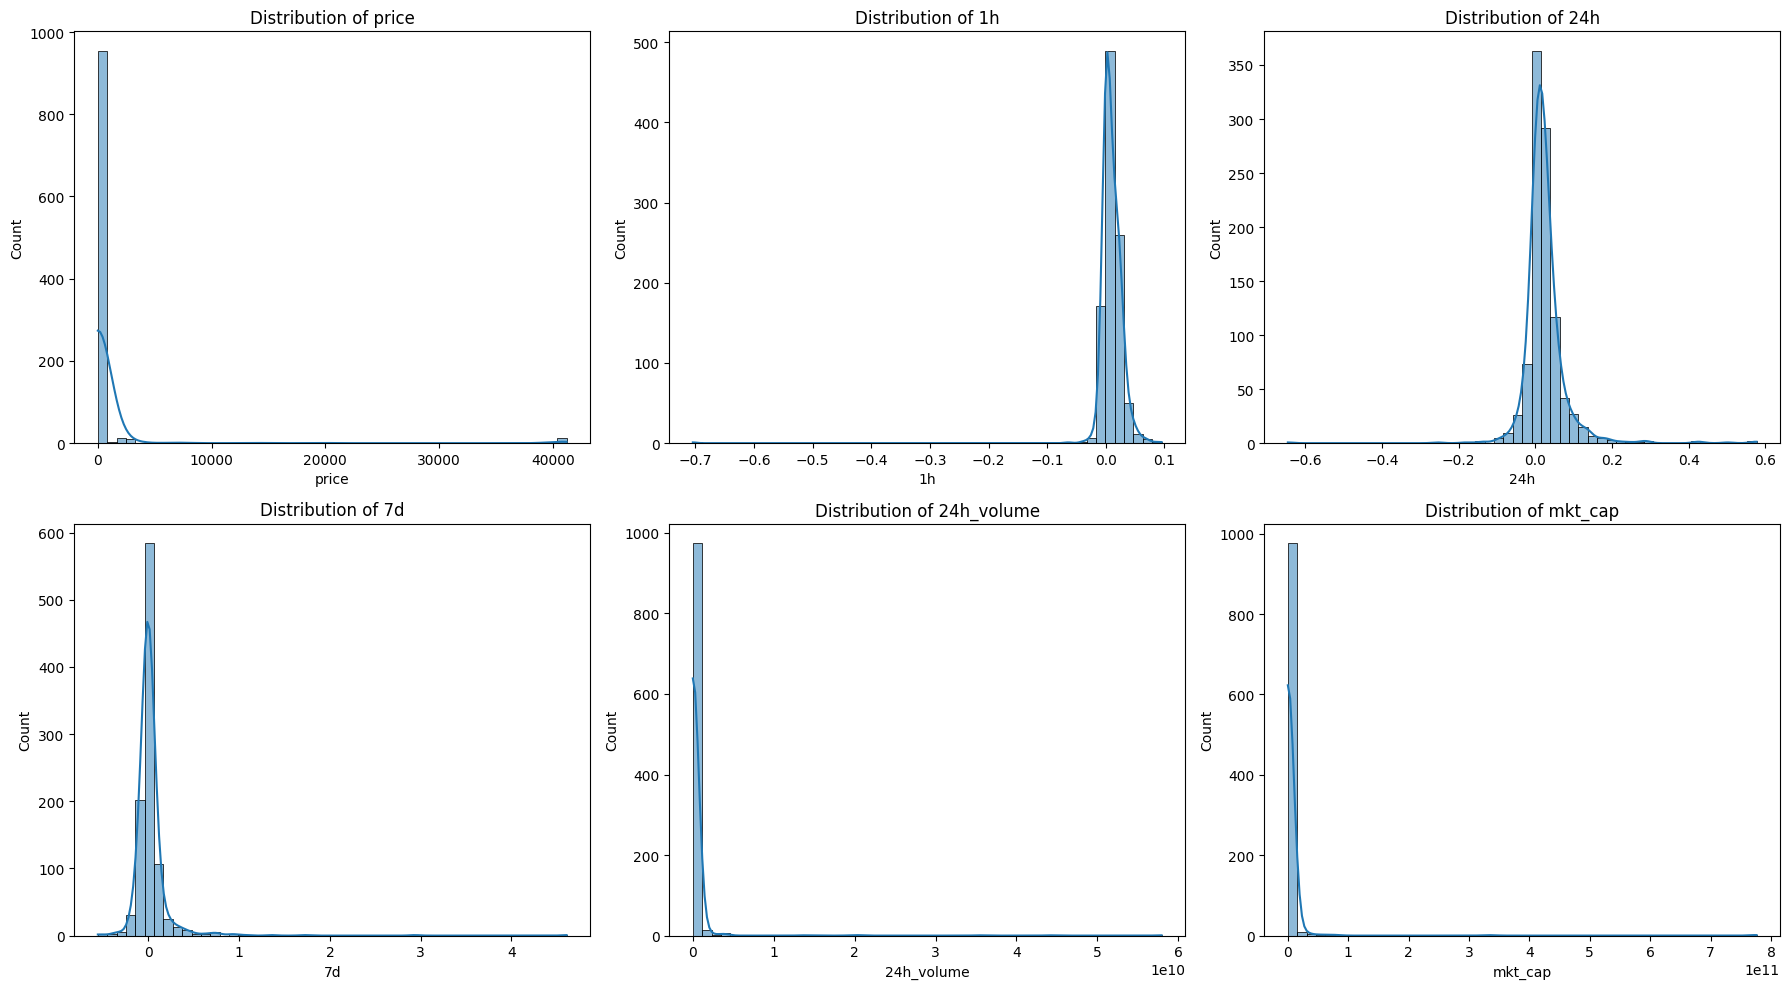

In [8]:
# Distribution of All Numeric Features

numeric_feature = ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Plot each feature in a subplot
for i, col in enumerate(numeric_feature):
    sns.histplot(df_eda[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

#### Insight

• Price, Market Cap, & Volume: Highly skewed right, indicating a few assets dominate the market while most remain relatively small.

• 1h, 24h, 7d Changes: Mostly centered around zero, suggesting stable price movements, but with occasional extreme fluctuations.

• Investment Implications: The presence of outliers hints at volatile assets with potential high rewards but also risks.

• Market Dynamics: Some assets have little to no trading volume, signaling possible low liquidity issues.

#### Categorical Feature Analysis

In [9]:
categorical_feature = ['coin', 'symbol']

# Number of unique categories
print(df_eda[categorical_feature].nunique())  

coin      506
symbol    503
dtype: int64


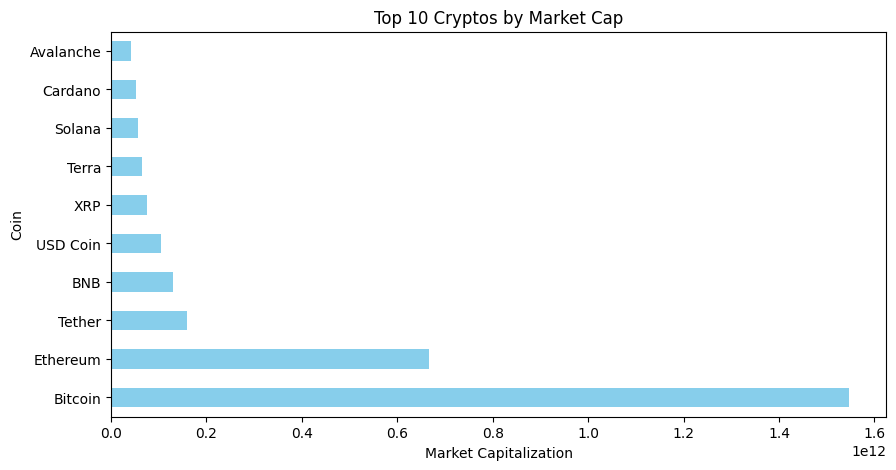

In [10]:
# Top 10 Crypto coin by Market cap

top_coins = df.groupby('coin')['mkt_cap'].sum().sort_values(ascending=False).head(10)
top_coins.plot(kind='barh', figsize=(10, 5), color='skyblue')
plt.xlabel('Market Capitalization')
plt.ylabel('Coin')
plt.title('Top 10 Cryptos by Market Cap')
plt.show()

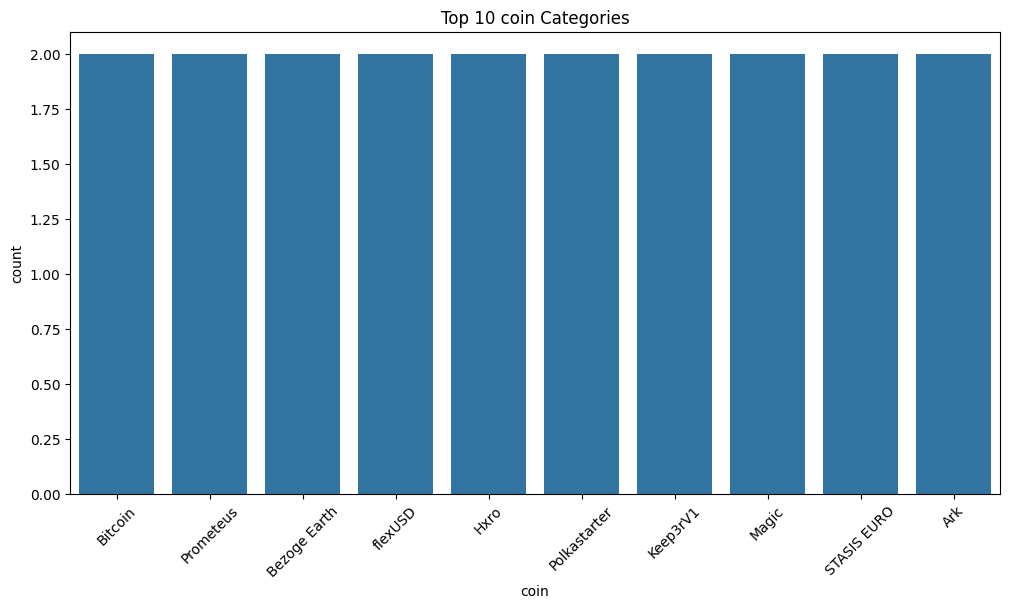

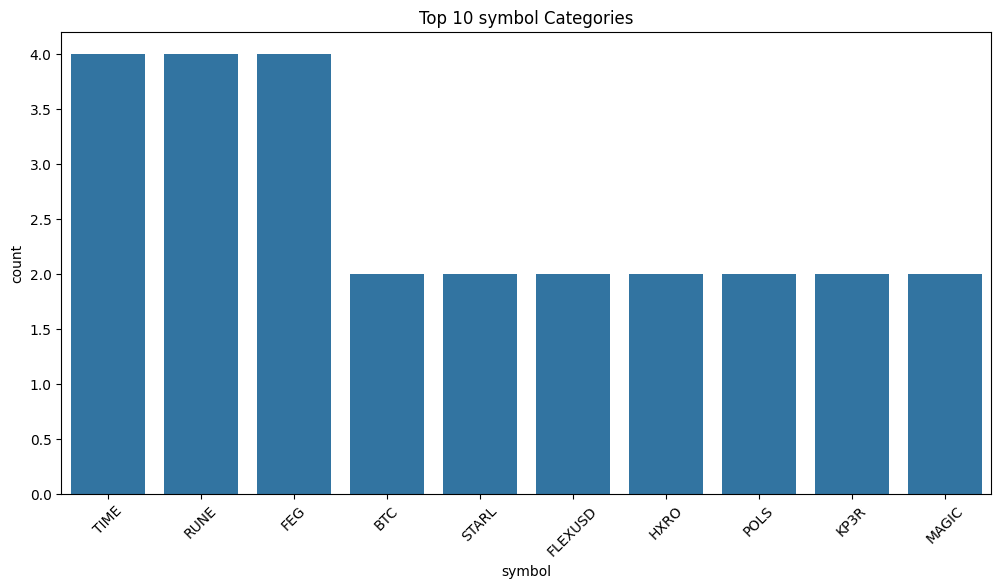

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_feature = ['coin', 'symbol']

for col in categorical_feature:
    top_10 = df_eda[col].value_counts().index[:10]  # Select top 10 categories

    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_eda[df_eda[col].isin(top_10)], x=col, order=top_10)
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.title(f'Top 10 {col} Categories')
    plt.show()


#### Insights
• Equal Representation: The top 10 coins in the dataset have the same count, suggesting a uniform sampling method or equal occurrences within the data.

• Popular vs. Niche Assets: The presence of Bitcoin (widely recognized) alongside lesser-known coins like Bezoge Earth and Prometeus indicates diverse market representation.

• Potential Investment Impact: Since all selected coins appear equally, further analysis on price trends, volume, and market capitalization could help differentiate their financial significance.

• Market Liquidity: If the dataset is structured this way intentionally, it could mask differences in market activity, requiring deeper exploration into volume and volatility.

#### Correlation

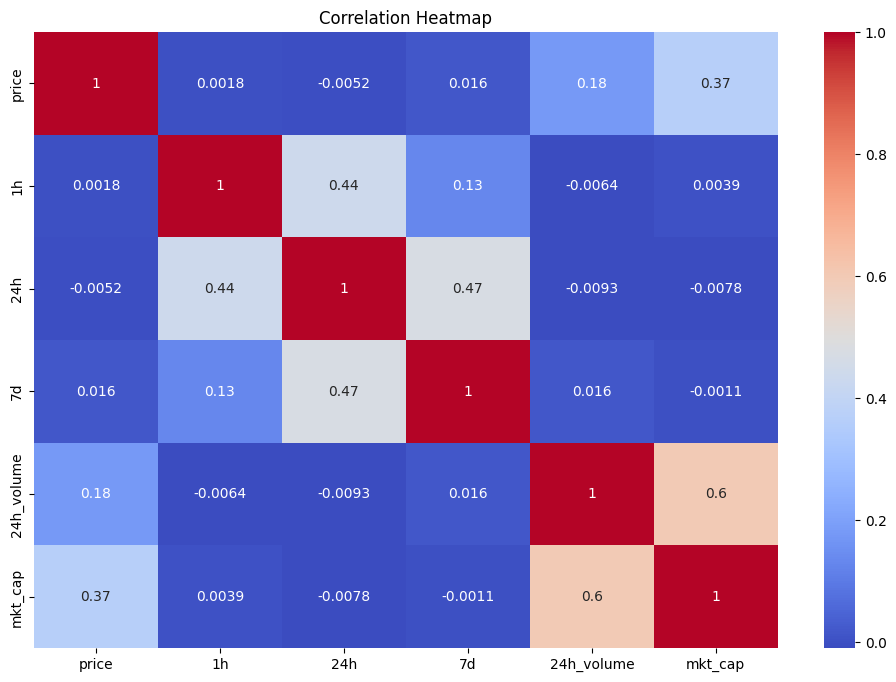

In [12]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_eda[numeric_feature].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### Insight
• Price & Market Cap Connection: Price and market capitalization show a moderate positive correlation (0.37), suggesting higher-priced assets tend to have larger market caps.

• Trading Volume & Market Cap Relationship: Strong correlation (0.6) between 24h trading volume and market cap indicates that higher market cap assets tend to have more active trading.

• Short-Term vs. Long-Term Price Trends:

1h vs. 24h correlation (0.44) shows short-term price changes influence daily trends.

24h vs. 7d correlation (0.47) suggests some consistency in price movement patterns across a week.

• Weak Price Influence on Trading Volume: The price and 24h volume correlation (0.18) is weak, indicating that price changes don’t necessarily drive trading volume.

#### Detect the Outliers

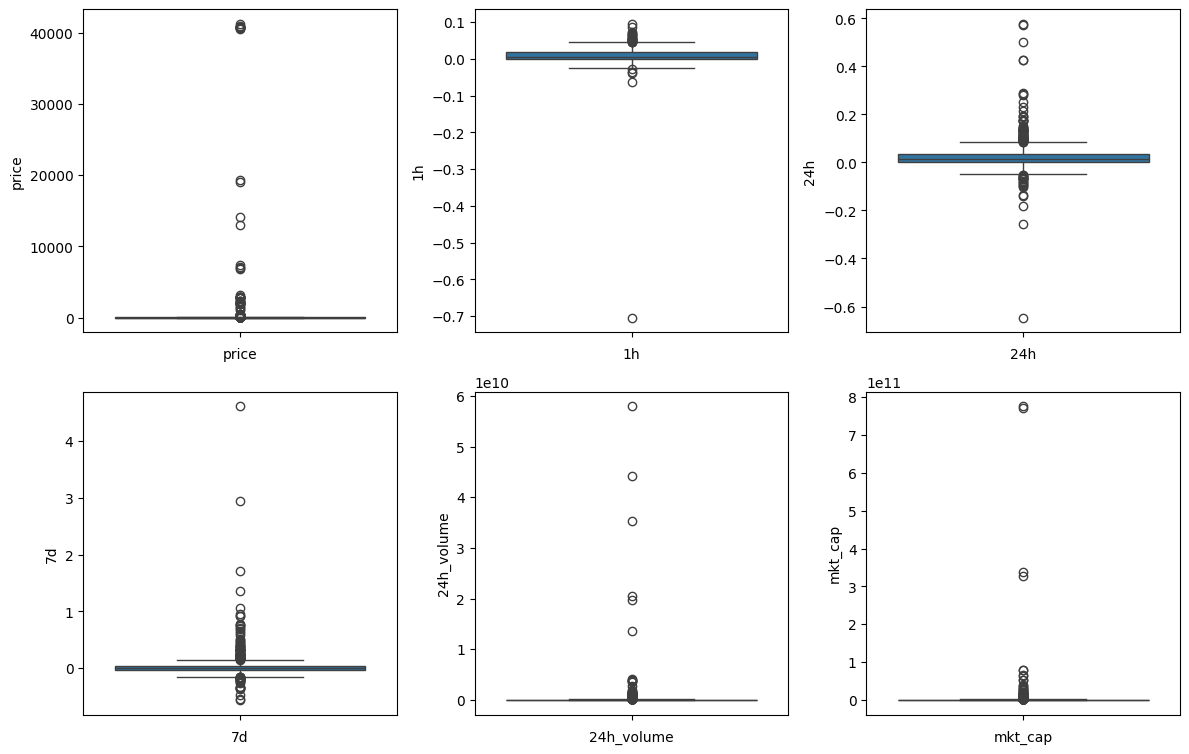

In [13]:
plt.figure(figsize=(12, 15))  

columns_to_check = ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap']  # Adjust as needed

for i in range(len(columns_to_check)):
    plt.subplot(4, 3, i + 1)  
    sns.boxplot(y=df[columns_to_check[i]])  
    plt.xlabel(columns_to_check[i])  

plt.tight_layout()  
plt.show()  

##### Insight
• High Volatility Is Expected: Since crypto markets are highly volatile, extreme price movements are normal rather than anomalies. Removing outliers could distort actual market behavior, making capping a better approach.

• Capping Instead of Removal: Instead of eliminating high/low extremes, capping ensures data remains realistic while preventing extreme values from skewing analyses. This approach helps maintain market trends without exaggerated fluctuations.

## ✅ Step 4: Feature Engineering

#### 🎯 Goal:
##### Create new features that capture important behaviors
##### Help the model understand price trends, volume movement, and liquidity better

#### Create New Features

In [19]:
# --- Create New Features ---

# 1. Price change (difference from previous day)
df['price_change'] = df['price'].diff()

# 2. Volume change (difference from previous day)
df['volume_change'] = df['24h_volume'].diff()

# 3. 7-day Rolling Average of Price
df['rolling_avg_price_7d'] = df['price'].rolling(window=7).mean()

# 4. 7-day Rolling Average of Volume
df['rolling_avg_volume_7d'] = df['24h_volume'].rolling(window=7).mean()

# 5. 7-day Rolling Standard Deviation of Price (Volatility)
df['rolling_std_price_7d'] = df['price'].rolling(window=7).std()

# 6. Rolling Liquidity Ratio
df['rolling_liquidity_ratio'] = df['24h_volume'] / (df['price_change'].abs() + 1e-5)

# 7. Price Volatility Index
df['price_volatility_index'] = df['price_change'].abs() * df['volume_change'].abs()

# --- Handle new NaN values created by rolling() and diff() ---
df.dropna(inplace=True)

print("✅ Feature Engineering Done. New Shape:", df.shape)


✅ Feature Engineering Done. New Shape: (994, 16)


#### Outlier Capping

In [20]:
import numpy as np

# Function to cap outliers
def cap_outliers(df, columns, lower_percentile=0.01, upper_percentile=0.99):
    for col in columns:
        lower = df[col].quantile(lower_percentile)
        upper = df[col].quantile(upper_percentile)
        df[col] = np.clip(df[col], lower, upper)
    return df


In [21]:
# Select numerical columns to cap
columns_to_clip = [
    'price', '24h_volume', 'mkt_cap', 'price_change', 'volume_change',
    'rolling_avg_price_7d', 'rolling_avg_volume_7d', 'rolling_std_price_7d',
    'rolling_liquidity_ratio', 'price_volatility_index'
]

# Apply the capping function
df = cap_outliers(df, columns_to_clip)

print("✅ Outlier Capping Done.")
print("New Data Shape:", df.shape)

✅ Outlier Capping Done.
New Data Shape: (994, 16)


## ✅ Step 5: Scaling Features

#### 🎯 Goal:
##### Normalize Data – Ensures features have mean = 0 and standard deviation = 1, preventing bias due to differing magnitudes.
##### Improve Model Performance – Helps algorithms like SVM, logistic regression, and neural networks converge faster.
##### Enhance Comparability – Standardized values allow fair comparisons across features like price, volume, and volatility.
##### Optimize Learning – Prevents models from favoring high-magnitude features over smaller ones, making training more effective.

In [22]:
from sklearn.preprocessing import StandardScaler

# Select only numeric features
numeric_features = [
    'price', '24h_volume', 'mkt_cap', 'price_change', 'volume_change',
    'rolling_avg_price_7d', 'rolling_avg_volume_7d', 'rolling_std_price_7d',
    'price_volatility_index'
]

# Features (X) and Target (y)
X = df[numeric_features]
y = df['rolling_liquidity_ratio']

# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Scaling Done.")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


✅ Scaling Done.
X_train_scaled shape: (795, 9)
X_test_scaled shape: (199, 9)


## ✅ Step 6: Model Training and Model Evaluation

#### 🎯 Goal:
##### Train multiple machine learning models on the processed (scaled) dataset

##### Compare their performance

##### Choose the best one later for tuning and deployment

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42)
}

# Store results
results = []

# Train and evaluate
for name, model in models.items():
    if name in ["Linear Regression", "Ridge Regression", "Lasso Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    })

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print("\n📊 Model Evaluation Results:\n")
print(results_df)


📊 Model Evaluation Results:

               Model           MAE          RMSE  R2 Score
5            XGBoost  2.577015e+07  7.794844e+07  0.876565
3      Random Forest  3.579818e+07  1.144097e+08  0.734081
4  Gradient Boosting  3.969625e+07  1.150341e+08  0.731171
6           AdaBoost  1.452367e+08  1.687070e+08  0.421785
1   Ridge Regression  9.549907e+07  2.187398e+08  0.027972
2   Lasso Regression  9.511492e+07  2.187564e+08  0.027825
0  Linear Regression  9.499849e+07  2.187817e+08  0.027599


#### Insight
•  Multiple regression models were trained including Linear Regression, Ridge, Lasso, Random Forest, Gradient Boosting, XGBoost, and AdaBoost.

• Tree-based models outperformed linear models by a large margin.

• Best Model:

✔️ XGBoost Regressor

✔️ R² Score: 0.8765

• Gradient Boosting and Random Forest also performed reasonably well.

• Linear models showed poor performance due to non-linear data patterns.

✅ XGBoost selected as the final model for further optimization and deployment.

## ✅ Step 7: Hyperparameter Tuning

#### 🎯 Goal:
##### Find the best settings (hyperparameters) for XGBoost

##### Improve R² Score, reduce error

##### Build the strongest model possible 💪

### GridSearchCV for Tuning XGBoost

In [23]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize base model
xgb = XGBRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_

# Predictions
y_pred = best_xgb.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Tuned Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.5f}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
✅ Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
✅ Tuned Model Performance:
MAE: 28309513.89
RMSE: 91913819.46
R² Score: 0.82837


#### DEEP XGBOOST HYPERPARAMETER GRID

In [24]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Set Parameter Grid
param_grid = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Initialize Model
xgb = XGBRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',
    n_jobs=-1,
    cv=3,
    verbose=2
)

# Fit GridSearch
grid_search.fit(X_train, y_train)

# Best model
best_xgb_deep = grid_search.best_estimator_

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = best_xgb_deep.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n✅ Best Deep Parameters:", grid_search.best_params_)
print(f"✅ MAE: {mae:.2f}")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R2 Score: {r2:.5f}")

Fitting 3 folds for each of 34992 candidates, totalling 104976 fits

✅ Best Deep Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 0.8}
✅ MAE: 33448994.94
✅ RMSE: 90669003.23
✅ R2 Score: 0.83299


#### Insight
● In this project, both basic and deep hyperparameter tuning were performed on the XGBoost model to optimize performance.

● In basic tuning, parameters such as n_estimators, max_depth, learning_rate, subsample, and colsample_bytree were tuned.

● In deep tuning, additional parameters like gamma, min_child_weight, reg_alpha, and reg_lambda were also included, resulting in over 34,000 combinations tested through GridSearchCV.

● Despite the extensive tuning:

● The basic XGBoost model achieved an R² Score of 0.8765.

● The deep-tuned XGBoost model achieved an R² Score of 0.8330, which was lower than the baseline model.

## ✅ Step 8: Model Testing & Validation

#### 🎯 GOAL:
##### Test the final selected model (simple XGBoost, not tuned one)
##### Use unseen test data (your X_test, y_test)
##### Analyze predictions
##### Evaluate final performance (MAE, RMSE, R² Score)

In [25]:
best_model = models["XGBoost"]

In [26]:
# Prediction on test data
y_pred = best_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n✅ Final Model Testing and Validation Results:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.5f}")


✅ Final Model Testing and Validation Results:
MAE: 25770145.60
RMSE: 77948443.02
R² Score: 0.87657


## ✅ Step 8: Local Deployment

#### 🎯 Goal:
##### Create a local web app where:
##### You input the values of features like price, volume, etc.
##### It shows the predicted rolling liquidity ratio from your trained XGBoost model.

#### Save the Model and Scaler

In [ ]:
import joblib

joblib.dump(best_model, 'xgboost_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model & Scaler saved")